# Chapter 4: Accuracy and Speed

Computers have limitations on the precision of numbers and the calculations that use them. In many calculations these will not be an issue. Occasionally, however, they do affect calculations. It is important to understand these limitations, when they may occur and how to find ways to deal with them when necessary. That is the topic of Chapter 4 in the textbook and  in this Notebook you will explore many of the main points discussed in that Chapter. 

### 4.1 - Variables and Ranges

**_Overflow:_** "floats" have maximum values ($\approx 10^{308}$ or $2^{1024}$) and minimum values ($\approx -10^{308}$ or $-2^{1022}$). Outside this range it is just **INF** or **-INF**. If the computer computes a number out of this range we say it *overflows.* 

**_Underflow:_** The closest to zero "floats" can be is $\approx 10^{-308}$. Smaller numbers are simply 0. This can cause errors in calculations and must be watched for. A When a number gets too close to zero like this, it is called an *underflow.*

"int" type numbers have no limit to size in Python. However, calculations with integers become slower when there are large numbers of digits involved. (**NOTE:** This is not true in many other languages, where there are limitations for integer size.)

Let's investigate these limits (or lack of limit for integer values).

##### Exercise 4-1: (Modified)
First read the original prompt. 

"Write a program to calculate and print the factorial of a number entered by he user. If you wish you can base your program on the user-defined function for factorial given in Section 2.6, but write your program so that it calculates the factorial using *integer* variables, not floating-point ones. Use your program to calculate the factorial of 200. Now modify your program to use floating-point  variables instead and again calculate the factorial of 200. What do you find? Explain."

In the next cell, I have programmed two factorial functions, based on Section 2.6. *int_factorial(n)* uses integer valued numbers while **float_factorial(n)** uses float valued numbers. It prints the factorial of N for each case. 
1. Starting with N = 160, increase the value of N slowly. Watch the value of the exponent for the float case as it approaches 308. 
2. What value of N does the exponent of N! exceed 308? 
### ANSWER



3. What happens in the int case and the float case when you cross this threshold?
### ANSWER: Crossing this threshold in the int case still produces a number, while the float case just returns an overflow, inf.




In [1]:
# Compute n factorial using integer valued numbers and variables.
def int_factorial(n):
    f = int(1)
    for k in range(1,n+1):
        f *= int(k)
    return f

# Compute n factorial using float valued numbers and variables.
def float_factorial(n):
    f = float(1)
    for k in range(1,n+1):
        f *= float(k)
    return f

# Take the factorial of this number, N
N = 308 # ***** MODIFY THIS NUMBER *****

# Print the results for each case
print("Factorial using integers: ")
print( int_factorial(N) )
print("")
print("Factorial using floats: ")
print( float_factorial(N) )

Factorial using integers: 
22615336402145916927270438091431130125983421020769619844574059315326933059484879774995553474461971248267571073931781559295396441336653563606624594340154659633650833330279896787214388132756809079993995437059384513389942884614894115404172688999284892687113307976752973139398050305820312071811956008102883940284697324529142570853188710227515275354039188747968097717474301251403717154190135202504534034210406433663263627372248126993079001912263836942243738859260946830176225429130179162557040314101365400048333608832445428914519602890304026320131938259377210785792000000000000000000000000000000000000000000000000000000000000000000000000000

Factorial using floats: 
inf


This could be a problem. If you accidentally hit this limit at some point in your calculations, it may cause problems. Consider these calculations:

In [2]:
z = float_factorial(200)
print( float_factorial(100) )
print( z/float_factorial(100) )
print( float_factorial(100)/z )

9.33262154439441e+157
inf
0.0


**Question:** Once z reaches INF, do you get an error when z is used in later calculations? Could this affect the reliability of your calculation without you knowing? (Remember that you don't normally print every value used in your calculations.)

### ANSWER: No errors are raised when z reaches inf; when z reaches +- inf it's just treated as a very large number that goes to 0 when in the denominator and inf when in the numerator. This could definitely  affect the reliability of calculations since it could zero out terms that have very large numbers in the denominator, even though the denominator terms are not exactly zero. It could also discount terms that would normally cancel each other out, such as the case of 200!/100!.


# 4.2 Numerical Error

If you haven't, I encourage you to read Chapter 4. Numerical uncertainties can accumulate and may result in significant uncertainties in many computational physics calculation. If you are summing many numbers and each has some rounding error, then the errors may accumulate. The result may become unreliable at some point. Let's investigate a bit.

**The difference of two numbers**  
As the textbook mentions, say you have two numbers:
$$
x =  100000000000000 \qquad \qquad \qquad \\
y =  100000000000001.2345678901234
$$
The problem is that the computer only represents decimal numbers accurately to a limited number of significant figures. It truncates these to:
$$
x = 100000000000000 \ \ \qquad \qquad \quad \ \ \\
y = 100000000000001.2 \qquad \qquad \quad \
$$
Try taking the difference...

In [3]:
x = 100000000000000
y = 100000000000001.2345678901234
print(y-x)

1.234375


We expect the difference to be 1.2345678901234, but we get 1.234375. The difference is only accurate to three decimal places!

##### Example 4.1: The difference of two numbers

Say we have two numbers,
$$
x = 1, \qquad y = 1 + 10^{-14} \sqrt{2}
$$
The difference $y - x$ (plus slight algebra) is
$$
10^{14} \left( y - x \right) = \sqrt{2}
$$
If we substitue the original values, $x=1$ and $y = 1 + 10^{-14} \sqrt{2}$, into this equation, the lefthand side should equal $\sqrt{2}$. Does it?
### Answer: No, only accurate to two digits.

In [4]:
from math import sqrt
x = 1.0
y = 1.0 + (1e-14)*sqrt(2)
print( "Lefthand side:  ", (1e14)*(y-x) )
print( "Righthand side: ", sqrt(2) )

Lefthand side:   1.4210854715202004
Righthand side:  1.4142135623730951


They are only accurate to two decimal places. Everything else is meaningless garbage. In fact, this difference from the true value of $\sqrt{2}$ is off by 0.48%. This could be significant. Even more, if you are adding many numbers, the uncertainty could accumulate if you are adding many numbers that are consistantly off in this way.

#### Exercise 4.2: Quadratic equations

In [5]:
a = 0.001
b = 1000
c = 0.001

print("Part A")
print("Positive solution: [-b + sqrt(b^2 - 4ac)]/2a")
print( (-b + sqrt(b*b - 4*a*c))/(2*a) )
print("Negative solution: [-b - sqrt(b^2 - 4ac)]/2a")
print( (-b - sqrt(b*b - 4*a*c))/(2*a) )
print("")
print("Part B")
print("\"Positive\" solution: 2c/[-b - sqrt(b^2 - 4ac)]")
print( (2*c)/(-b - sqrt(b*b - 4*a*c)) )
print("\"Negative\" solution: 2c/[-b + sqrt(b^2 - 4ac)]")
print( (2*c)/(-b + sqrt(b*b - 4*a*c)) )
print("")


Part A
Positive solution: [-b + sqrt(b^2 - 4ac)]/2a
-9.999894245993346e-07
Negative solution: [-b - sqrt(b^2 - 4ac)]/2a
-999999.999999

Part B
"Positive" solution: 2c/[-b - sqrt(b^2 - 4ac)]
-1.000000000001e-06
"Negative" solution: 2c/[-b + sqrt(b^2 - 4ac)]
-1000010.5755125057



The problem arises because the square root term (for $a=0.001$, $b=1000$, $c=0.001$) is almost the same size as $b$. In the cases where the term we compute the difference between b and $\sqrt{b^{2} + 4 a c}$ this causes uncertainty in the results. Notice the one solution for the second method is off by more than 10.

Consider this code, which is a more reliable method to implement the quadratic formula:

In [6]:
from numpy import sqrt

a = 0.001    #float(input("Enter a: "))
b = 1000.     #float(input("Enter b: "))
c = 0.001    #float(input("Enter c: "))

squareroot = sqrt(b*b- 4*a*c)
if b>0.0:
    r1 = (-b-squareroot)/(2*a)
    r2 = 2*c/ (-b-squareroot)
else:
    r1 = (-b+squareroot)/(2*a)
    r2 = 2*c/ (-b+squareroot)
print ( "(r1, r2) = ", r1, r2)

(r1, r2) =  -999999.999999 -1.000000000001e-06


### 4.3 Program speed

Sometimes it is useful to understand how fast your code works. This might be important in an large accelerator experiment (like the LHC or RHIC experiments) where huge quantities of data must be processed on an extremely short time scale. Or, imagine you have to design a very, very complex calculation that could take weeks to process. Understanding how fast your code works can be very useful. Even some simple programming steps could save enormous ammounts of time! 

Consider Example 4.2 in the text. Imagine if that was written in a way that was not optimized as it discusses. And imagine it was used constantly in a "weeks long" calculation. That wasted time could really add up! 

The time wasted due to inefficient code probably isn't important in many simpler calculations but it may be extremely important in others. 

Let's explore program speed using the "time" package. Notice how I implemented it in this solution to an earlier exercise.
1. import time module
2. Save the start time before the section of code I want to time.
3. Save the end time after the section of code I want to time.
4. Print the difference.

In [7]:
#Exercise 2.9: The Madelun constant (Condensed Matter)\n",
# Madelung constant = total electric potential felt by atom in a solid. \n",
# Asked to compute (+/-)1/sqrt(i**2 + j**2 + k**2), + when i+j+k=EVEN, - when i+j+k=ODD.\n",
import time
from math import sqrt
L = 100
s=0

# (Extra) A couple lines for measuring processing time.
startTime = time.time()

for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (i+j+k)%2 == 0:
                sign = 1
            else:
                sign = -1   # 0
            if (i**2 + j**2 + k**2) != 0:
                s += sign/sqrt(i**2 + j**2 + k**2)

print("Madelung Contstant =",s)

# (Extra) The rest is for measuring processing time.
endTime = time.time()
print("start time = ",startTime)
print("end time = ",endTime)
print("processing time = ",endTime-startTime)
print(s)


Madelung Contstant = -1.7418198158396654
start time =  1677723777.201849
end time =  1677723788.965131
processing time =  11.763282060623169
-1.7418198158396654


Let's try an even simpler calculation. The code in the next cell has three nested loops, each with N iterations. All it does is add 1 to s for each iteration. That is one addition operation. Therefore, s is estimating the number of operations being performed by the loops. There are N operations for each loop. Use this information and the code in the next cell to answer the following questions.

**Question:** What is the total number of operations performed by the nested loops if each iterates N times? Write a simple expression. How is output s related to the input N?   

### ANSWER: Total number of operations: s=N^3. s is the cube of N.

**Question:** What happens if N is increased from 10 to 200 to 500?


### ANSWER The number of operations by a cubic factor, depending of what it's being compared to. For example, when N=10, $s_{10}=10^3$. Increasing N to 200 increases the number of operations by 20^3, since s is the cube of N and N increases by a multiplicative factor of 20. $s_{200}=(20\times10)^3=20^3s_{10}$. This corresponds to an increase in processing time.

In [8]:
import time
from math import sqrt
N = 500
s=0

# (Extra) A couple lines for measuring processing time.
startTime = time.time()

for i in range(0,N):
    for j in range(0,N):
        for k in range(0,N):
            s += 1

# (Extra) The rest is for measuring processing time.
endTime = time.time()
print("start time = ",startTime)
print("end time = ",endTime)
print("processing time = ",endTime-startTime)

print("Number of operations \(s\): ",s)


start time =  1677723788.9732192
end time =  1677723797.0797
processing time =  8.106480836868286
Number of operations \(s\):  125000000


We can use the plotting and curve fitting algorithms from the PICUP exercises to investigate this a bit more. I've used the program above to time the code for different values of N. I did this four times for each value of N. These data are summarized in the arrays N and t in the following cell.

Text(0, 0.5, 'time (seconds)')

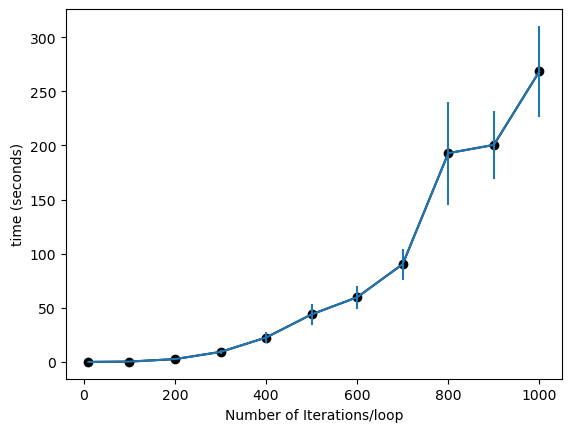

In [9]:
from pylab import plot,errorbar,xlabel,ylabel, figure
#import pylab as pl
import numpy as np

# Number of iterations for each of the three nested loops. 
N = [ 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]
# Time to run these three nested loops, (simply adding 1 and counting iterations each time).
'''
t = [ [ 0.00012302398681640625, 0.0009968280792236328, 0.0009958744049072266 ], 
      [ 0.42232418060302734, 0.4056835174560547, 0.27574586868286133 ],
      [ 3.5091216564178467, 3.848541736602783, 2.196122169494629 ],
      [ 12.978574514389038, 12.978574514389038, 7.732362508773804 ],
      [ 31.52307391166687, 31.14087414741516, 19.380882024765015,  ],
      [ 63.10438847541809, 60.49634671211243, 36.62477684020996, ],
      [ 83.33797526359558, 66.48685908317566, 63.983043909072876 ],
      [ 107.8349380493164, 105.35365009307861, 107.2390296459198 ],
      [ 224.81749486923218, 324.4172248840332, 158.58238124847412 ],
      [ 240.69623017311096, 242.34893703460693, 228.06716918945312 ],
      [ 318.52041721343994, 317.9129641056061, 314.2955174446106 ] ]
'''

#'''
t = [ [ 0.0009951591491699219, 0.00012302398681640625, 0.0009968280792236328, 0.0009958744049072266 ], 
      [ 0.12113118171691895, 0.42232418060302734, 0.4056835174560547, 0.27574586868286133 ],
      [ 0.90987229347229, 3.5091216564178467, 3.848541736602783, 2.196122169494629 ],
      [ 3.272766590118408, 12.978574514389038, 12.978574514389038, 7.732362508773804 ],
      [ 8.087835311889648, 31.52307391166687, 31.14087414741516, 19.380882024765015 ],
      [ 15.516372680664062, 63.10438847541809, 60.49634671211243, 36.62477684020996 ],
      [ 25.197484731674194, 83.33797526359558, 66.48685908317566, 63.983043909072876 ],
      [ 40.99669075012207, 107.8349380493164, 105.35365009307861, 107.2390296459198 ],
      [ 63.66801333427429, 224.81749486923218, 324.4172248840332, 158.58238124847412 ],
      [ 90.78463363647461, 240.69623017311096, 242.34893703460693, 228.06716918945312 ],
      [ 122.62303352355957, 318.52041721343994, 317.9129641056061, 314.2955174446106 ] ]
#'''
Ntrials = len(t[0])                       # Determine number of trials (automatically)
tMean = np.mean(t,axis=1)                  # Compute the mean time for each N
dtMean = np.std(t,axis=1)/np.sqrt(Ntrials) # Use the variation between trials to estimate uncertainty

# We expect a power law relationship t=CN^3. Let's prepare for a log-log plot.
# following the example of the PICUP exercise on Linearization.
ln_N = np.log(N)
ln_tMean = np.log(tMean)
dln_tMean = dtMean/tMean

# We need to convert these to arrays
N = np.array(N)
tMean = np.array(tMean)
dtMean = np.array(dtMean)
ln_N = np.array(ln_N)
ln_tMean = np.array(ln_tMean)
dln_tMean = np.array(dln_tMean)

# Let's plot this
#C = 1*10**(-6.9)
# ***** Note the use of figure() here forces the plot just below this cell. *****
# ***** There is some feature when autofit is used from utilities.ipynb.    *****
figure()

plot(N,tMean,"ko-")
errorbar(N,tMean,yerr=dtMean)
xlabel("Number of Iterations/loop")
ylabel("time (seconds)")


<IPython.core.display.Javascript object>


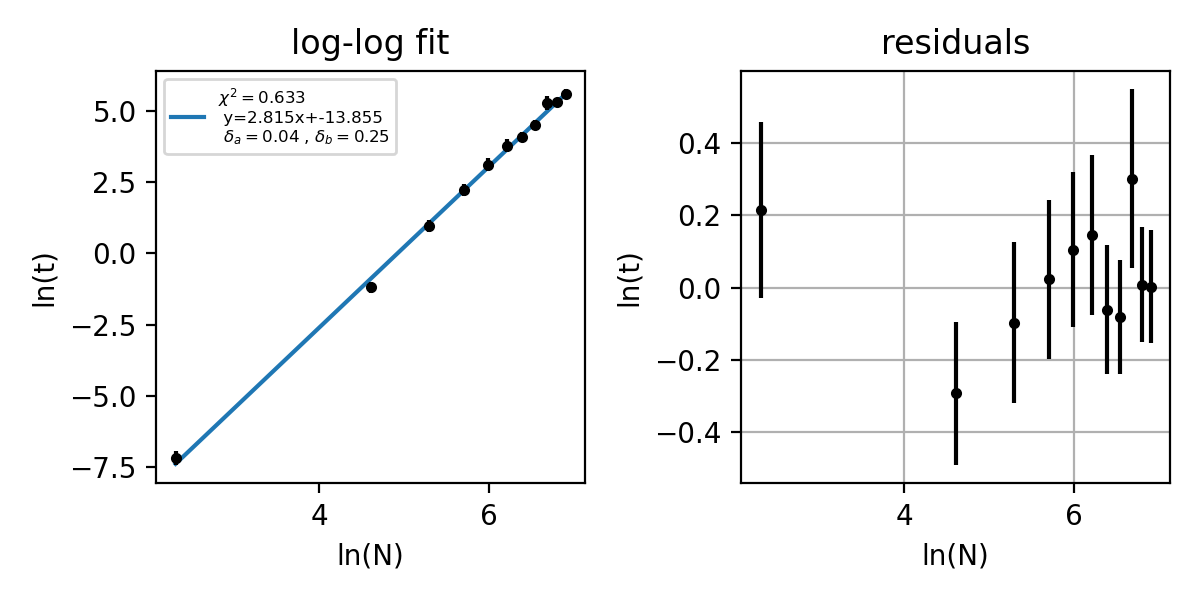

interactive(children=(FloatSlider(value=-13.854994479875584, description='intercept', max=-2.3854994479875584,…

In [10]:
%run ./utilities.ipynb

autoFit(x=ln_N, y=ln_tMean, dy=dln_tMean, title="log-log fit",xaxis="ln(N)", yaxis="ln(t)" )

**Exercise:**  Fill in the "..." in for your fit values in the next Markdown cell.

##### NOTE: the residuals look better with the earlier data points included. We could use more trials. The uncertainties are may be underestimated. Computer clocks are notoriously unreliable so the longer measurements may have significant variations. Also, the time measurement might also be affected by other process running on the computer, especially for the longer calculations.
Now let's extract the best fit coefficients and plot on linear axes with the data.
$$
\text{Intercept} = \ln{C}
$$
so
$$
C = \text{e}^{\text{Intercept}} = \text{e}^{-13.885}
$$
The slope is the exponent, so
$$
\alpha = \text{Slope} = 2.815
$$

Let's plot the fit and the original data on a linear plot.

<IPython.core.display.Javascript object>


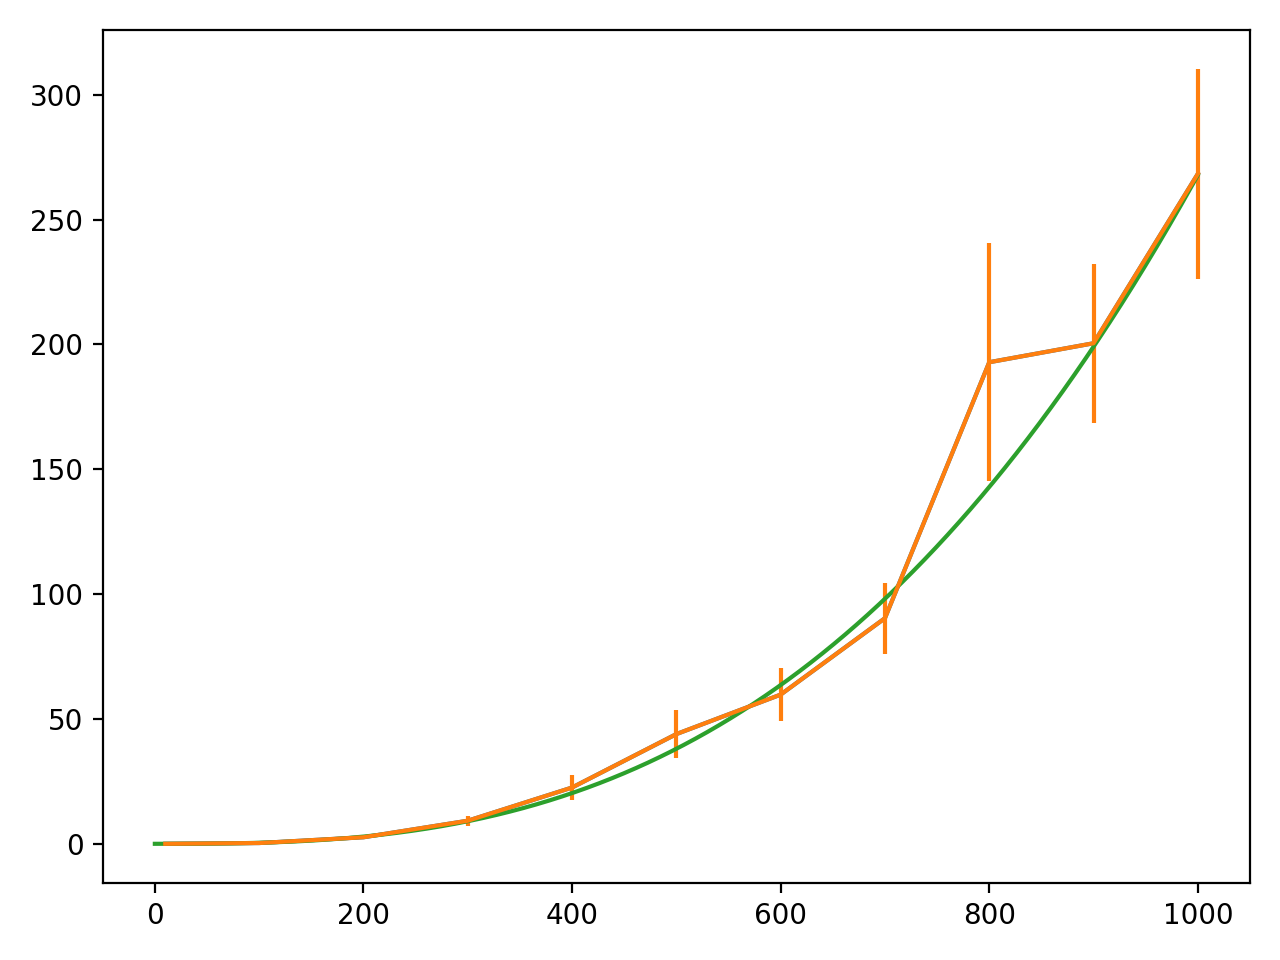

In [11]:
from pylab import plot,errorbar,xlabel,ylabel,figure
from numpy import e,arange


figure()

plot(N,tMean)
errorbar(N,tMean,yerr=dtMean)

# Construct the fit function from autofit values.
nFit = []
tFit = []
C_Fit = e**(-13.855)  #10**-14.972  # 3.14*e**(-7)
alpha_Fit = 2.815  #3.001
for n in arange(0,1000,0.1):
    nFit.append( n )
    tFit.append( C_Fit*n**alpha_Fit )
plot(nFit,tFit)


Sure enough, when we increase N the time for the calculation increases close to N^3. Probably the result would get closer to cubic with more trials and reduced errorbars.

**Question:**  Using the formula from our fit, estimate how long would it take if we increased the number of iterations up to $n=10^{6}$, $n=10^9$, $n=10^{10}$?

### ANSWER: Increasing the number of iterations to $n=10^6$ would correspond to a time of  $e^{-13.885}\cdot\left(10^6\right)^{2.815}$, $n=10^9$ would correspond to a time of  $e^{-13.885}\cdot\left(10^9\right)^{2.815}$, and $n=10^{10}$ would correspond to a time of  $e^{-13.885}\cdot\left(10^{10}\right)^{2.815}$.
Our formula is
$$
t = C N^{\alpha} = \left(e^{-13.885}\right) \ N^{2.815}
$$
The values for each case, converted to informative units are:

In [23]:
C=e**(-13.885)
alpha = 2.815
print(f"N = {10**3}, t = {C*(10**3)**alpha} seconds ({C*((10**3)**alpha)*(1/60)} minutes)")
print(f"N = {10**6}, t =  {C*(10**6)**alpha} seconds ({C*((10**6)**alpha)*(1/3600/24/365)} years)")
print(f"N = {10**9}, t = {C*(10**9)**alpha} seconds ({C*((10**9)**alpha)*(1/3600/24/365/(10**9))} billion years = {int(C*((10**9)**alpha)*(1/3600/24/365/(10**9))/13.8)} times the age of the Universe)")
print(f"N = {10**10}, t = {C*(10**10)**alpha} seconds ({C*((10**10)**alpha)*(1/3600/24/365/(10**9))} billion years = {int(C*((10**10)**alpha)*(1/3600/24/365/(10**9))/13.8)} times the age of the Universe)")


N = 1000, t = 259.9088805935402 seconds (4.331814676559003 minutes)
N = 1000000, t =  72413763413.65294 seconds (2296.225374608477 years)
N = 1000000000, t = 2.0175351914692637e+19 seconds (639.7562124141501 billion years = 46 times the age of the Universe)
N = 10000000000, t = 1.317713874590044e+22 seconds (417844.3285737075 billion years = 30278 times the age of the Universe)


**Question:**  What if the number of operations were increased from 1 operation each time (s = s+1) to say 100 or 1000 operations each iteration (keep N = 1000)? How would the time increase? 

Note that the number of operations changes only for the inner loop. For example, if there are 5 operations in the inner loop, instead of 1, it will be 5N operation for the inner loop for each of the N iterations of the outer two loops. Here's the calculation for 5 operations in the inner loop: $t = C {N} \times {N} \times {(5N)}=5N^{\alpha}$. Now try for 100 or 1000 operations each time through the inner loop and compare how long it takes.

### ANSWER: For an increase of 100 operations, this would correspond to an increase of time of $100^{\alpha}$, and an increase of 1000 operations would correspond to a time increase of $1000^{\alpha}$.


**Reconsider Example 4.2 in the textbook.** Now that you see how much longer code can take, you can see why efficient programming can save a lot of time. At least in complex calculations.


## Conclusion:

While the issues with data type (int vs float), numerical accuracy and program speed may not effect many straightforward calculations, they are not uncommon in computational physics problems. There are other numerical issues we will see later in this course as well. It is important to at least be aware of these issues so you might recognize when they occur. 

Even being aware of these issues, in grad school it once took around a month of my research time to track down an unexpected, and potentially interesting, "signal" in my research results. It turned out it was actually because someone had defined a histogram to use "short int" data type (on type in C++). I don't have a clue why they chose that data type. Anyway, certain bins were overflowing. There was no error from the computer, just the values were wrong and my results showed what could have been an interesting result. But it was not. Encountering such features is not that uncommon. 

The moral of this story is this. These issues really do occur. They can waste a lot of your time and may indicate results that are not real. So best to be aware and on the lookout. If you see an unexpected feature in your analysis, it is important to look for and rule out numerical issues.